In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pydicom as dicom
import os
import pandas as pd
import numpy as np
import shutil
import re
import cv2
from glob import glob
from skimage.io import imread
import nibabel as nib

In [2]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
data_dir =  'C:\\Users\\great\\Desktop\\Python\\ADC_data\\ADC_data\\'
patients = os.listdir(data_dir)
labels_df = pd.read_csv(r'C:\Users\great\Desktop\Python\Python\PROSTATEx_masks-master\Files\lesions\PROSTATEx_Classes.csv')

In [4]:
BASE_Path = r'C:\Users\great\Desktop\Python\Python\PROSTATEx_masks-master\Files\lesions\Masks'
all_images = glob(os.path.join(BASE_Path,'ADC','ProstateX*'))
print(all_images[0])

C:\Users\great\Desktop\Python\Python\PROSTATEx_masks-master\Files\lesions\Masks\ADC\ProstateX-0000-Finding1-ep2d_diff_tra_DYNDIST_ADC_ROI.nii.gz


In [5]:
img=nib.load(all_images[0])
img_data = img.get_fdata()
print(img_data.shape)
patients_1 = [all_images[i][84:98] for i in range(len(all_images))]
labels = labels_df['ID'].tolist()
print(patients_1[0])

(84, 128, 19)
ProstateX-0000


In [6]:
no_slices = []
re_sized = []
check_label = []
check_patient = []
masks = []
for num, patient in enumerate (patients_1[:]):
    label = int(labels_df['Clinically Significant'].loc[labels_df['ID'] == labels[num]])
    path = data_dir + patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
#     print (len(slices), slices[0].pixel_array.shape)
    img=nib.load(all_images[num])
    
    img_data = img.get_fdata()
    for i in range(img_data.shape[2]):
        if np.any(img_data[:,:,i]) == True:
#             print(img_data.shape[2])
#             print(patient, i)
            new_image = cv2.resize(np.array(slices[i].pixel_array),(128,128))
            re_sized.append(new_image)
            check_label.append(label)
            check_patient.append(patient)
            masks.append(1)
        elif len(slices)>i:
#             print(all_images[num])
#             print('\n', path)
            masks.append(0)
            new_image = cv2.resize(np.array(slices[i].pixel_array),(128,128))
            re_sized.append(new_image)
            check_label.append(label)
            check_patient.append(patient)

In [7]:
# for i in range(len(check_patient)):
#     print('Image array: ',re_sized[i].shape,'\t', 'Significance',check_label[i],'\t', 'Patient ID:', check_patient[i])

In [8]:
re_sized1 = np.asarray(re_sized)
check_label = np.asarray(check_label)
masks = np.asarray(masks)
print((re_sized1.shape))
print(masks.shape)

(5822, 128, 128)
(5822,)


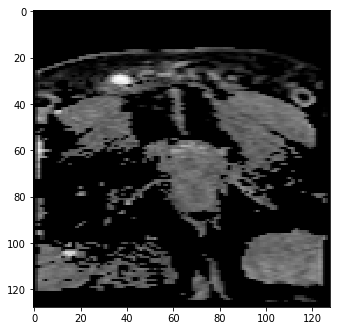

In [9]:
image1 = re_sized1[1]
# image2= re_sized[1667]
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(image1[:,:], cmap = 'gray')
# plt.subplot(222)
# plt.imshow(image2[:,:], cmap = 'gray')
# plt.savefig('ADC images before normalization')

In [10]:
notumor = []
tumor = []
masks_na = []
masks_a = []
for i in range(re_sized1.shape[0]):
    if masks[i] == 0:
        notumor.append(re_sized[i])
        masks_na.append(masks[i])
    elif masks[i] == 1:
        tumor.append(re_sized[i])
        masks_a.append(masks[i])

In [11]:
# print(len(m),len(masks_na))

In [12]:
print(len(notumor),len(tumor))
notumor = np.asarray(notumor)
tumor = np.asarray(tumor)
masks_na = np.asarray(masks_na)
masks_a = np.asarray(masks_a)

print(type(notumor),type(tumor))

4537 1285
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [13]:
np.random.shuffle(notumor)
train = notumor[:3630]
# masks_t = masks_na[:3637]
masks_t = masks_na[:3630]
print(train.shape)
# masks_t.shape

(3630, 128, 128)


In [14]:
train_half = notumor[3630:4537]
print(train_half.shape)
masks_th = masks_na[3630:4537]
# print(type(train_half))

(907, 128, 128)


In [15]:
tumor.shape,masks_th.shape

((1285, 128, 128), (907,))

In [16]:
# np.random.shuffle(tumor)
test,valid = tumor[:1028],tumor[1028:]
# masks_ta,masks_va = masks_a[:1033],masks_a[1033:]
masks_ta,masks_va = masks_a[:1028],masks_a[1028:]
print(test.shape)
print(valid.shape)
valid = valid
test = test
print(type(test))

(1028, 128, 128)
(257, 128, 128)
<class 'numpy.ndarray'>


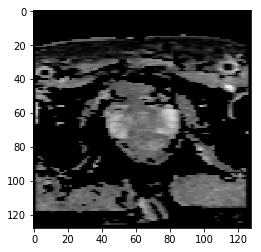

In [21]:
image3 = test[0]
plt.imshow(image3[:,:], cmap = 'gray')

In [26]:
test_data1 = np.concatenate((train_half,test),axis = 0)
masks_ta1 = np.concatenate((masks_th,masks_ta),axis=0)

In [34]:
# np.save('test_masks',masks_ta1)
# train.dtype
print(len(testing))

1935


In [28]:
m3 = np.max(test_data1)
mi3 = np.min(test_data1)
testing = (test_data1 - mi3) / (m3 - mi3)

In [29]:
m = np.max(train)
mi = np.min(train)
train = (train - mi) / (m - mi)

In [30]:
m1 = np.max(test)
mi1 = np.min(test)
test = (test - mi1) / (m1 - mi1)

In [31]:
m2 = np.max(valid)
mi2 = np.min(valid)
valid = (valid - mi2) / (m2 - mi2)

In [32]:
np.min(valid), np.max(valid)

(0.0, 1.0)

In [33]:
masks_ta1.shape,masks_t.shape,masks_va.shape

((1935,), (3630,), (257,))

In [35]:
train_data = np.reshape(train, (3630, 128, 128, 1))
test_data = np.reshape(test,(1028, 128, 128, 1))
valid_data = np.reshape(valid,(257,128,128,1))
testing = np.reshape(testing,(1935,128,128,1))

In [37]:
print (train_data.shape, testing.shape,valid_data.shape,test_data.shape)

(3630, 128, 128, 1) (1935, 128, 128, 1) (257, 128, 128, 1) (1028, 128, 128, 1)


In [39]:
# np.save('train_masks',masks_t)

In [40]:
# np.save('test_masks',masks_ta)

In [41]:
# np.save('valid_masks',masks_va)

In [38]:
np.save('ADC_test_data.npy',testing)

In [39]:
np.save('ADC_train_data.npy', train_data)

In [40]:
np.save('ADC_test_datasingle.npy', test_data)

In [41]:
np.save('ADC_valid_data.npy', valid_data)